In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
accidents_19 = pd.read_csv("Data/Road Safety Data - Accidents 2019.csv", low_memory=False)
accidents_18 = pd.read_csv("Data/dftRoadSafetyData_Accidents_2018.csv", low_memory=False)
accidents_17 = pd.read_csv("Data/dftRoadSafetyData_Accidents_2017.csv", low_memory=False)
accidents_16 = pd.read_csv("Data/dftRoadSafety_Accidents_2016.csv", low_memory=False)
accidents_15 = pd.read_csv("Data/Accidents_2015.csv", low_memory=False)

In [3]:
accidents_list = [accidents_19, accidents_18, accidents_17, accidents_16, accidents_15]
accidents = pd.concat(accidents_list)

In [4]:
vehicles_19 = pd.read_csv("Data/Road Safety Data- Vehicles 2019.csv", low_memory=False)
vehicles_18 = pd.read_csv("Data/dftRoadSafetyData_Vehicles_2018.csv", low_memory=False)
vehicles_17 = pd.read_csv("Data/dftRoadSafetyData_Vehicles_2017.csv", low_memory=False)
vehicles_16 = pd.read_csv("Data/dftRoadSafetyData_Vehicles_2016.csv", low_memory=False)
vehicles_15 = pd.read_csv("Data/Vehicles_2015.csv", low_memory=False)

In [5]:
vehicles_list = [vehicles_19, vehicles_18, vehicles_17, vehicles_16, vehicles_15]
vehicles = pd.concat(vehicles_list)

In [6]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192061 entries, 0 to 257844
Data columns (total 23 columns):
 #   Column                            Non-Null Count    Dtype 
---  ------                            --------------    ----- 
 0   Accident_Index                    1192061 non-null  object
 1   Vehicle_Reference                 1192061 non-null  int64 
 2   Vehicle_Type                      1192061 non-null  int64 
 3   Towing_and_Articulation           1192061 non-null  int64 
 4   Vehicle_Manoeuvre                 1192061 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  1192061 non-null  int64 
 6   Junction_Location                 1192061 non-null  int64 
 7   Skidding_and_Overturning          1192061 non-null  int64 
 8   Hit_Object_in_Carriageway         1192061 non-null  int64 
 9   Vehicle_Leaving_Carriageway       1192061 non-null  int64 
 10  Hit_Object_off_Carriageway        1192061 non-null  int64 
 11  1st_Point_of_Impact               1192061 non-null 

In [7]:
# Filters accidents by any involving a pedal cycle
cycles = vehicles[vehicles['Vehicle_Type'] == 1]
indices = cycles['Accident_Index']
cycle_accidents = accidents[accidents['Accident_Index'].isin(indices)]

In [8]:
cycle_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91534 entries, 2 to 140046
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               91534 non-null  object 
 1   Location_Easting_OSGR                        91517 non-null  float64
 2   Location_Northing_OSGR                       91517 non-null  float64
 3   Longitude                                    91517 non-null  float64
 4   Latitude                                     91517 non-null  float64
 5   Police_Force                                 91534 non-null  int64  
 6   Accident_Severity                            91534 non-null  int64  
 7   Number_of_Vehicles                           91534 non-null  int64  
 8   Number_of_Casualties                         91534 non-null  int64  
 9   Date                                         91534 non-null  object 
 1

In [9]:
casualties_19 = pd.read_csv("Data/Road Safety Data - Casualties 2019.csv", low_memory=False)
casualties_18 = pd.read_csv("Data/dftRoadSafetyData_Casualties_2018.csv", low_memory=False)
casualties_17 = pd.read_csv("Data/dftRoadSafetyData_Casualties_2017.csv", low_memory=False)
casualties_16 = pd.read_csv("Data/dftRoadSafetyData_Casualties_2016.csv", low_memory=False)
casualties_15 = pd.read_csv("Data/Casualties_2015.csv", low_memory=False)

In [10]:
casualties_list = [casualties_19, casualties_18, casualties_17, casualties_16, casualties_15]
casualties = pd.concat(casualties_list)
casualties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852321 entries, 0 to 186188
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      852321 non-null  object
 1   Vehicle_Reference                   852321 non-null  int64 
 2   Casualty_Reference                  852321 non-null  int64 
 3   Casualty_Class                      852321 non-null  int64 
 4   Sex_of_Casualty                     852321 non-null  int64 
 5   Age_of_Casualty                     852321 non-null  int64 
 6   Age_Band_of_Casualty                852321 non-null  int64 
 7   Casualty_Severity                   852321 non-null  int64 
 8   Pedestrian_Location                 852321 non-null  int64 
 9   Pedestrian_Movement                 852321 non-null  int64 
 10  Car_Passenger                       852321 non-null  int64 
 11  Bus_or_Coach_Passenger              852

In [11]:
# Accidents that involved pedal cycle but casualty was not cyclist
references = cycles['Vehicle_Reference']
other_casualties = casualties[~casualties['Vehicle_Reference'].isin(references)]
len(other_casualties['Casualty_Type'])

55

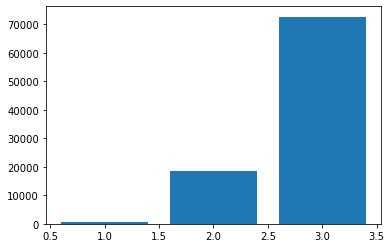

In [12]:
var1 = cycle_accidents['Accident_Severity'].value_counts().reset_index()
plt.bar(var1['index'], var1['Accident_Severity'])
plt.show()

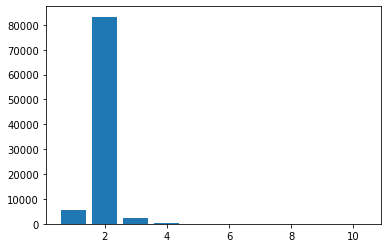

In [13]:
var1 = cycle_accidents['Number_of_Vehicles'].value_counts().reset_index()
plt.bar(var1['index'], var1['Number_of_Vehicles'])
plt.show()

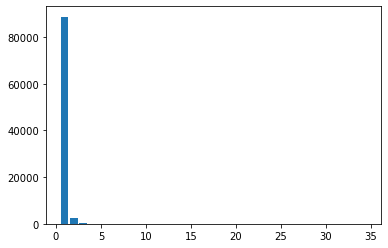

In [14]:
var1 = cycle_accidents['Number_of_Casualties'].value_counts().reset_index()
plt.bar(var1['index'], var1['Number_of_Casualties'])
plt.show()

In [15]:
cycle_accidents.loc[:,'Month'] = pd.to_datetime(cycle_accidents.loc[:,'Date'], format='%d/%m/%Y')
cycle_accidents.loc[:,'Month'] = cycle_accidents.loc[:,'Month'].dt.month

C:\Users\kelly\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\kelly\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


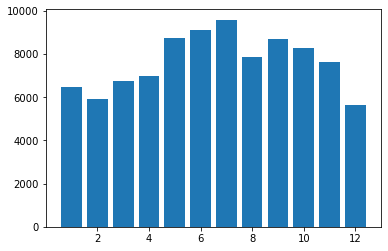

In [16]:
var1 = cycle_accidents['Month'].value_counts().reset_index()
plt.bar(var1['index'], var1['Month'])
plt.show()

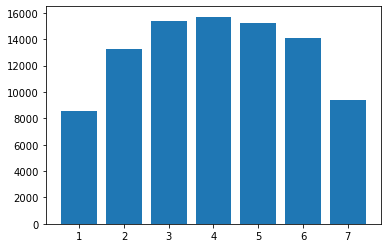

In [17]:
var1 = cycle_accidents['Day_of_Week'].value_counts().reset_index()
plt.bar(var1['index'], var1['Day_of_Week'])
plt.show()

In [58]:
times = cycle_accidents['Time'].dropna()
times = times.astype(str)
times = times.str.replace(":", "")
times = times.apply(float)

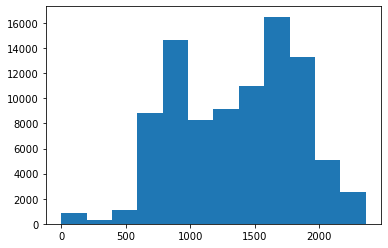

In [60]:
plt.hist(times, bins=12)
plt.show()